<a href="https://colab.research.google.com/github/ro0tst/AirManagement/blob/main/AirManagement_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import pandas as pd
import datetime as dt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

df4 = pd.read_csv('/content/save data_2.csv')
m2 = keras.models.load_model("/content/my_h5_model/my_h5_model.h5")
df4=df4.iloc[:570]
x = df4['Flow Rate']
x = x.astype('float32')
x = x.to_numpy()
if len(x) % 30 != 0:
    x = x[:-(len(x) % 30)]  # Truncate x to make it divisible by 30
x = np.reshape(x, (-1, 30, 1))
df_aux3 = df4
vm = []
x=np.zeros(570)
for i in range(len(df_aux3)):
    x[i] = df_aux3["Flow Rate"][i] / 100
vm = np.reshape(x, (-1, 30, 1))
val = []
val_norm = []
for i in range(len(x)):
    val.append(x[i] * 100)
val_norm.append(x[i])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
pred=m2.predict(vm)
print(pred)

1/1 [==============================] - 0s 441ms/step
[[0.35320225]
 [0.31682855]
 [0.2194839 ]
 [0.2069691 ]
 [0.42626286]
 [0.18901783]
 [0.4357804 ]
 [0.02239715]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385912]
 [0.00385911]]


Text(0, 0.5, 'l/min')

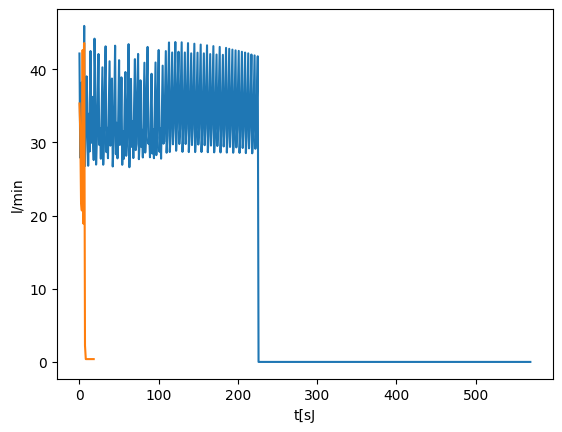

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(val)
plt.plot(pred*100)
ax.set_xlabel('t[sJ')
ax.set_ylabel('l/min')

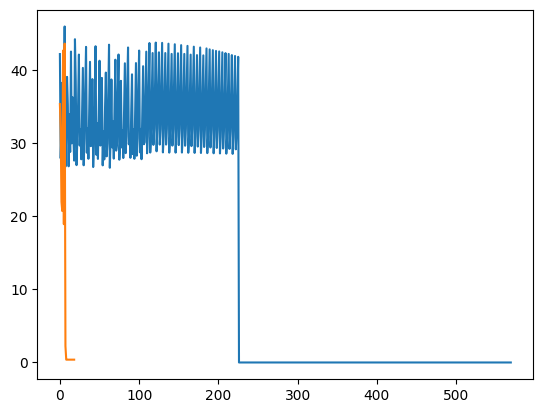

In [10]:
plt.plot(val) #albastru date reale
plt.plot(pred*100) # rosu date prezise